In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
data=pd.read_csv("/content/archive (3).zip")

In [55]:
data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [44]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [46]:
data.shape

(1462, 5)

In [47]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [48]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [49]:
data.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [50]:
data.interpolate()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


<Axes: xlabel='meantemp'>

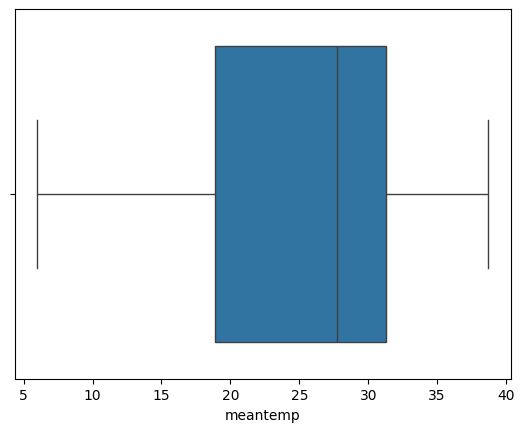

In [57]:
sns.boxplot(x=data['meantemp'])

<Axes: xlabel='humidity'>

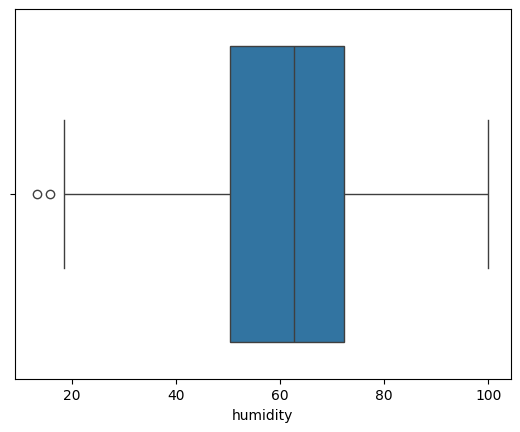

In [58]:
sns.boxplot(x=data['humidity'])


<Axes: xlabel='wind_speed'>

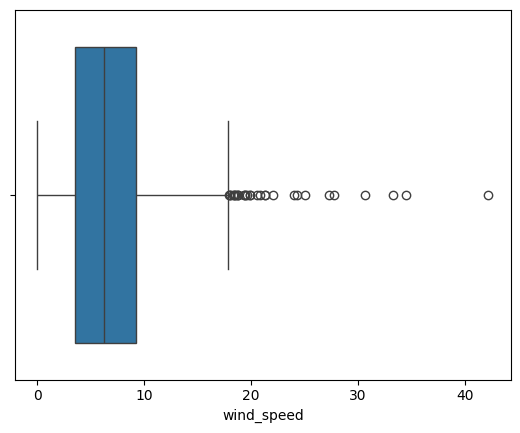

In [59]:
sns.boxplot(x=data['wind_speed'])


<Axes: xlabel='meanpressure'>

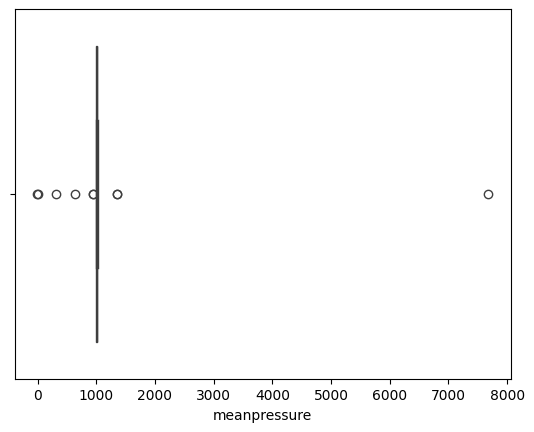

In [60]:
sns.boxplot(x=data['meanpressure'])

Text(0.5, 1.0, 'MeanPressure')

<Figure size 10000x8000 with 0 Axes>

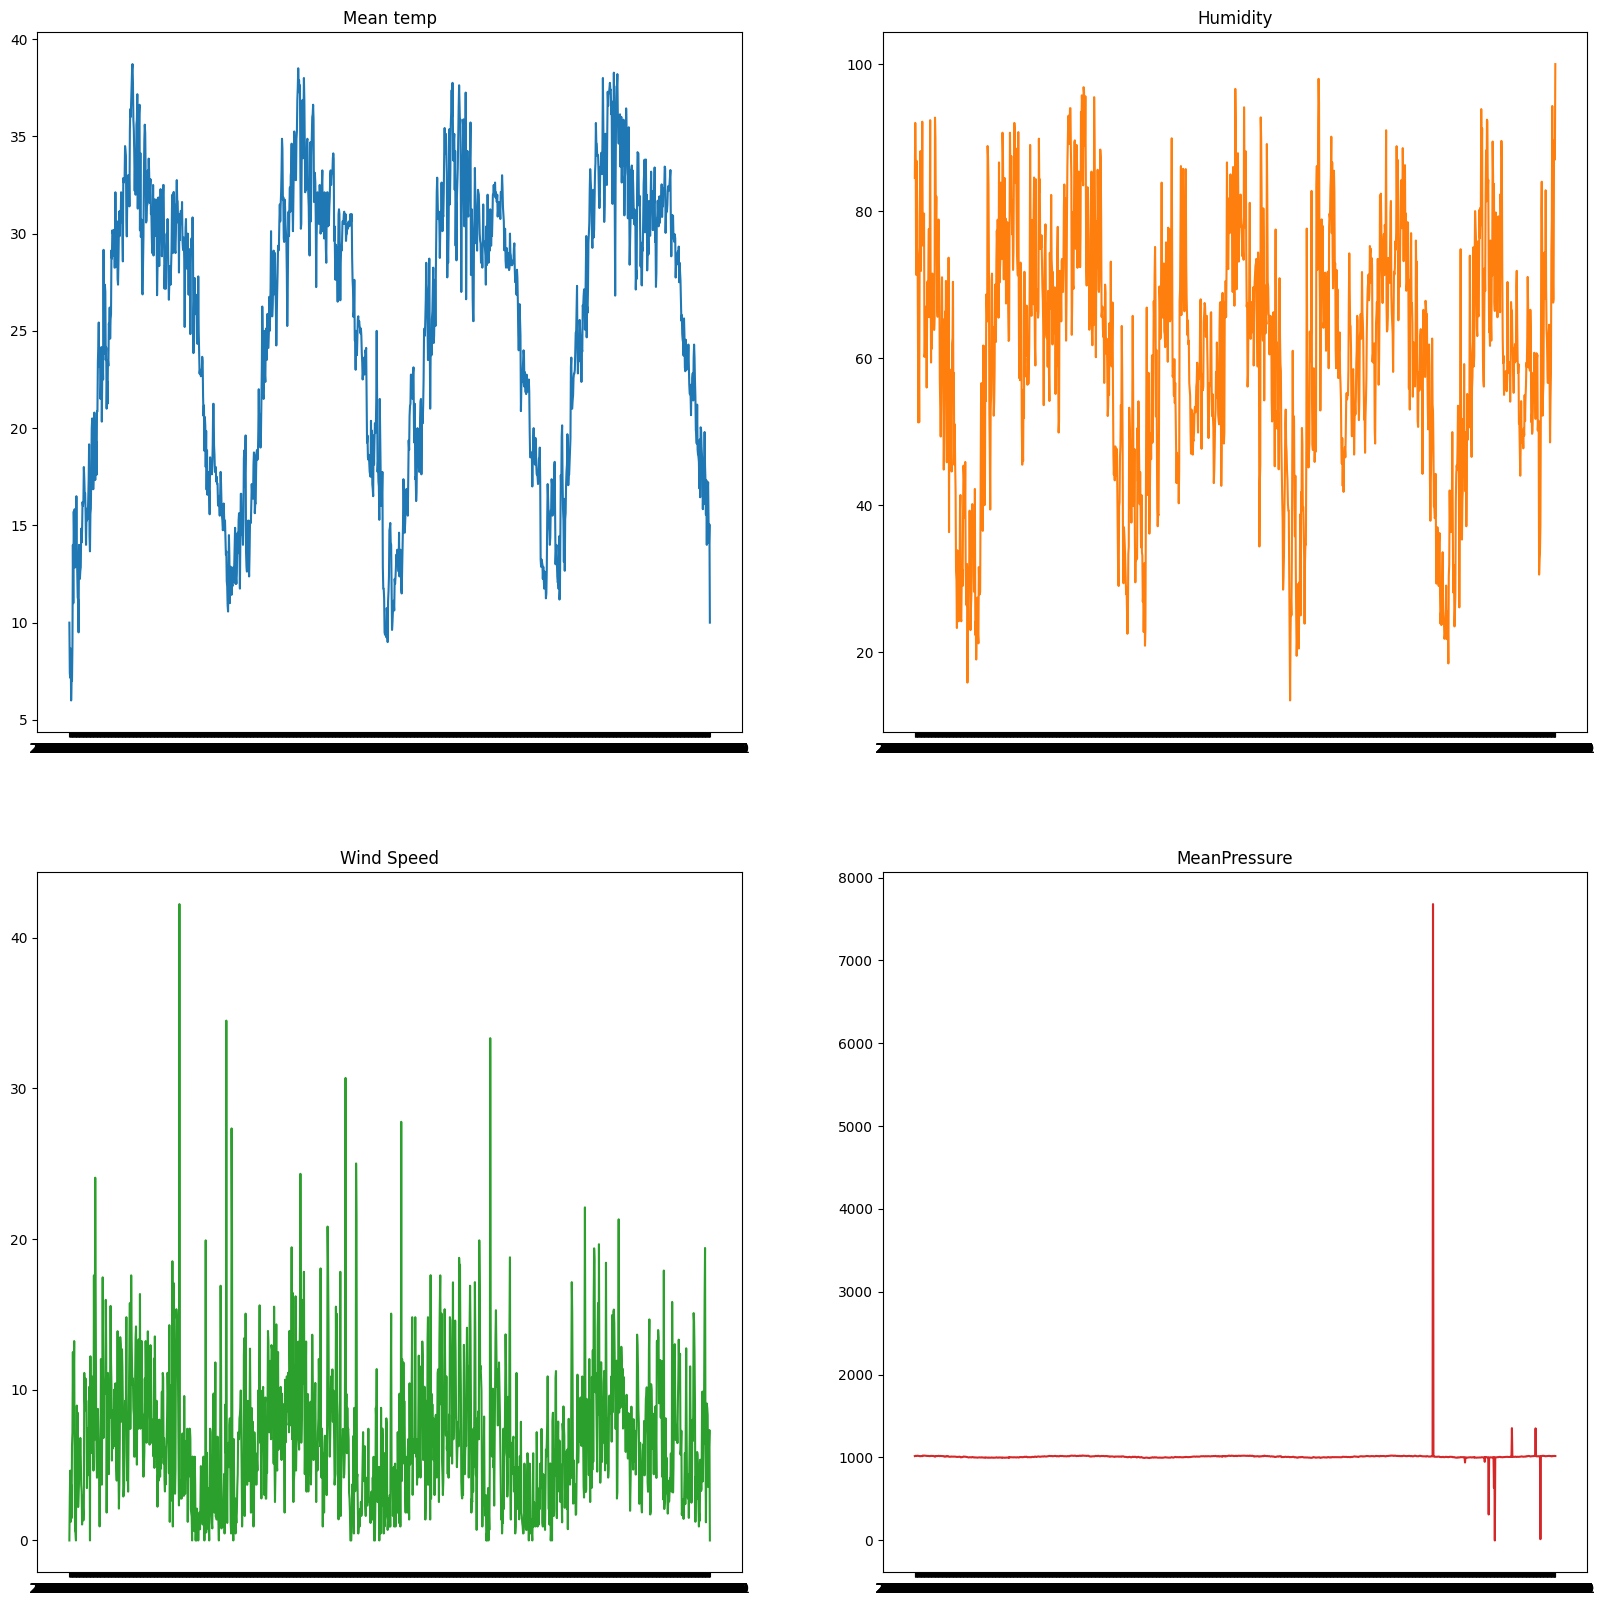

In [69]:
plt.figure(figsize=(100,80))
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0, 0].plot(data['date'],data['meantemp'])
axs[0, 0].set_title('Mean temp')
axs[0, 1].plot(data['date'],data['humidity'], 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[1, 0].plot(data['date'],data['wind_speed'], 'tab:green')
axs[1, 0].set_title('Wind Speed')
axs[1, 1].plot(data['date'],data['meanpressure'], 'tab:red')
axs[1, 1].set_title('MeanPressure')

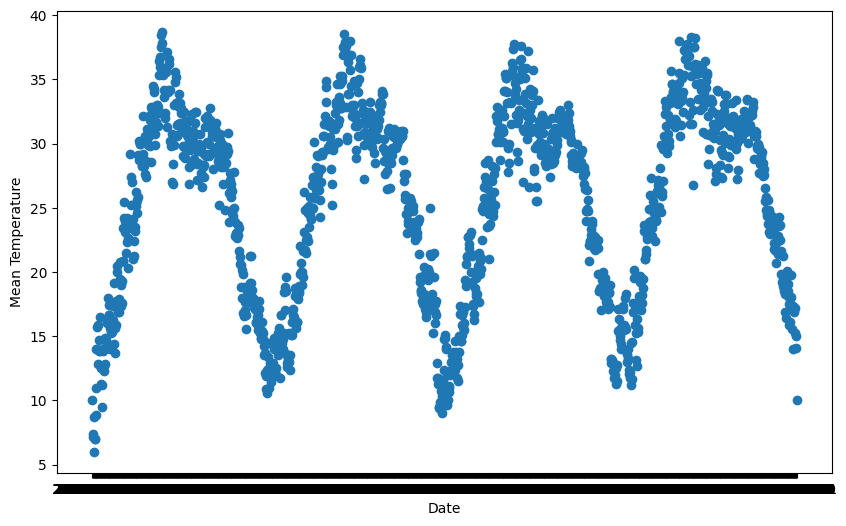

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['date'], data['meantemp'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
plt.show()

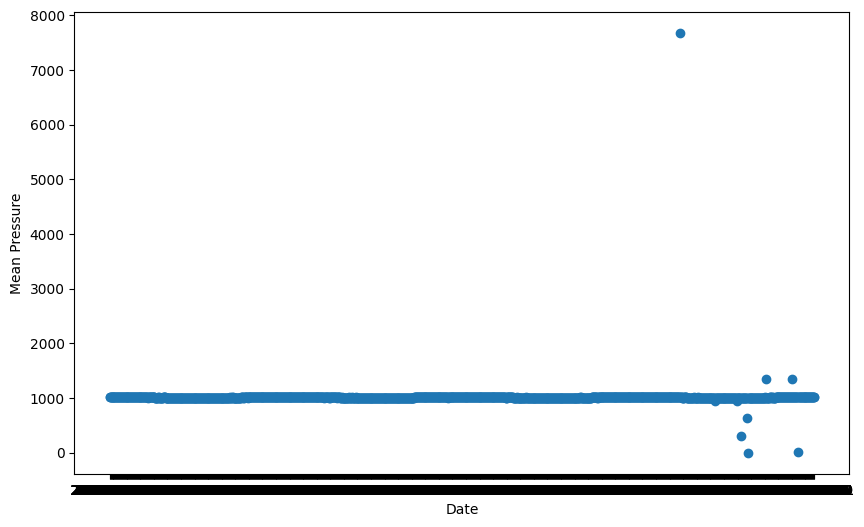

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['date'], data['meanpressure'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean Pressure')
plt.show()

In [3]:
temp_data = data.iloc[:,1:2]

In [4]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
temp_data= ss.fit_transform(temp_data)


In [5]:


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [6]:
look_back = 1
dataX, dataY = create_dataset(temp_data, look_back)

In [7]:
dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1],1))

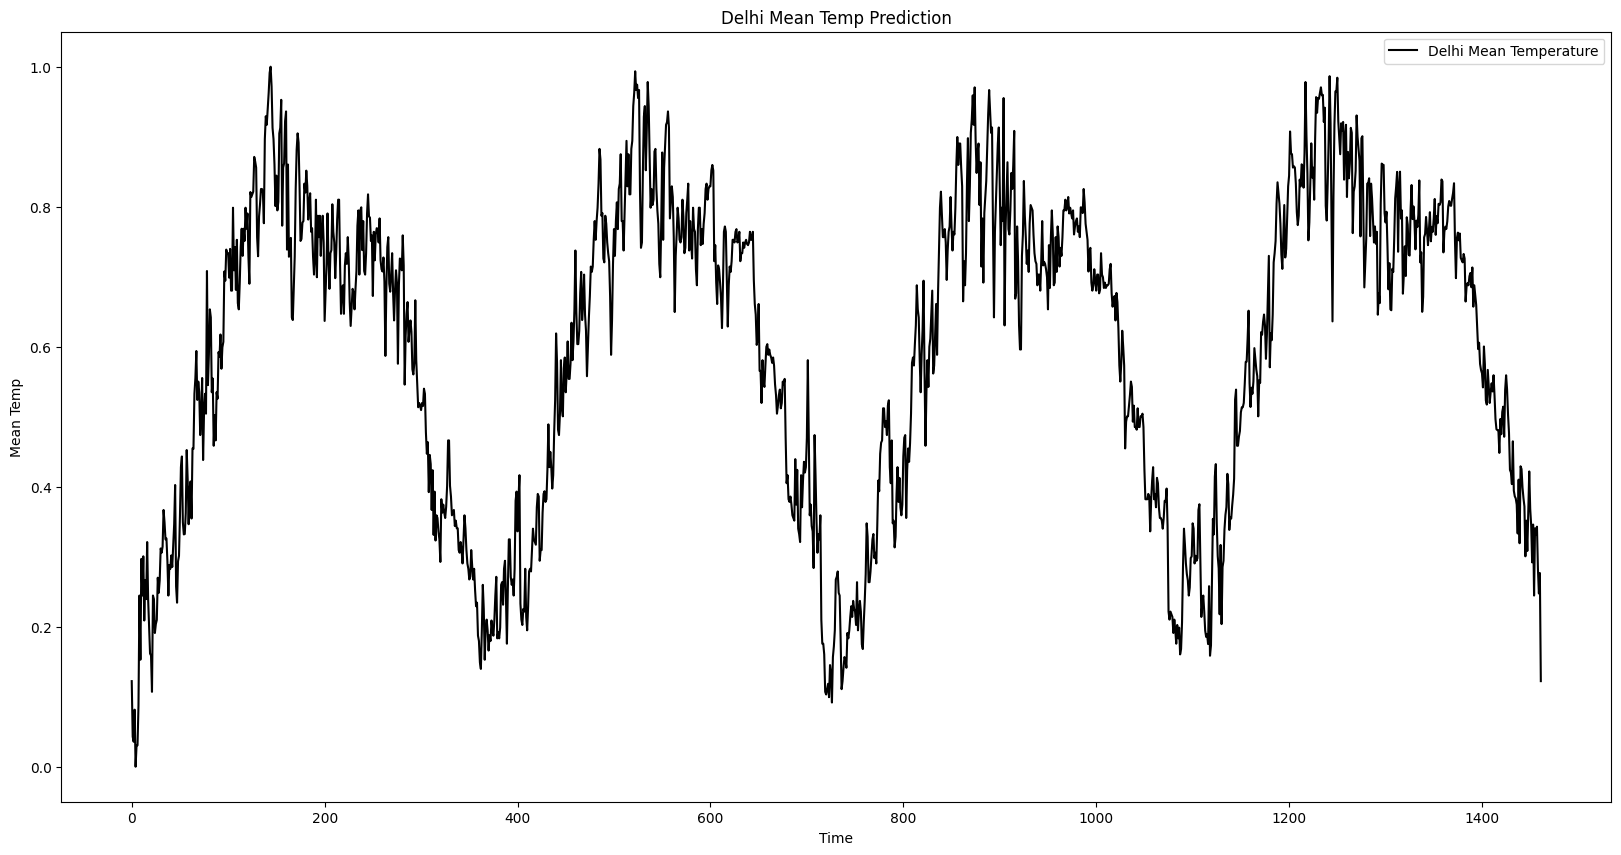

In [11]:
plt.figure(figsize=(20,10))
plt.plot(temp_data, color = 'black', label = 'Delhi Mean Temperature')
plt.title('Delhi Mean Temp Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

In [12]:

wind_data= data.iloc[:,3:4]

In [13]:

wind_data= ss.fit_transform(wind_data)

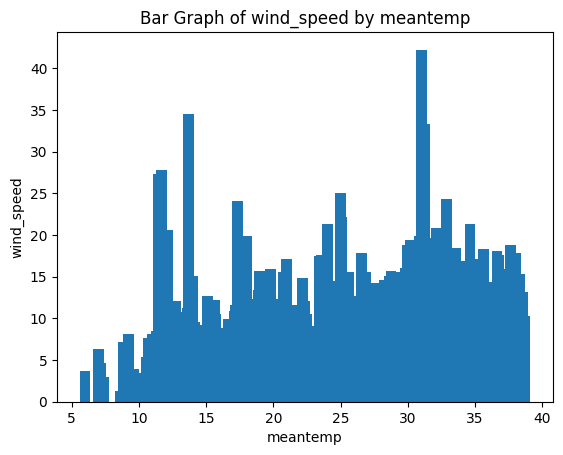

In [19]:
plt.bar(data['meantemp'], data['wind_speed'])
plt.title('Bar Graph of wind_speed by meantemp')
plt.xlabel('meantemp')
plt.ylabel('wind_speed')
plt.show()

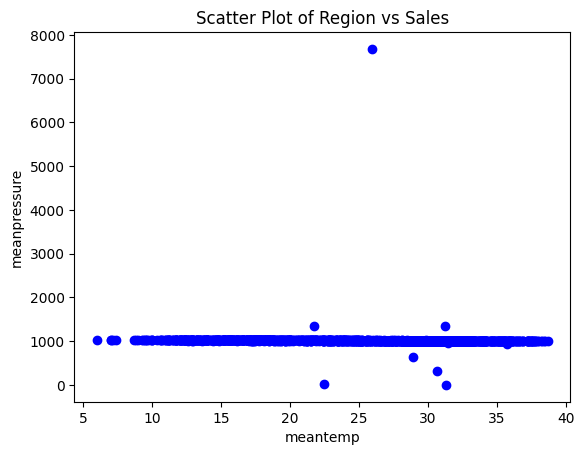

In [20]:
plt.scatter(data['meantemp'], data['meanpressure'], c="blue")
plt.title('Scatter Plot of Region vs Sales')
plt.xlabel('meantemp')
plt.ylabel('meanpressure')
plt.show()